<a href="https://colab.research.google.com/github/Suman-SekarSagadev/1-Titanic---Machine-Learning-from-Disaster/blob/main/s_Boosting_techniques_KNN(9%2B10_nov).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("customer_churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# Null values

data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
data["TotalCharges"].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [ ]:
a = " "
type(a)

str

In [ ]:
data["TotalCharges"].replace(" ", np.nan, inplace = True)

In [ ]:
pd.set_option("display.max_rows", None)

In [ ]:
data["TotalCharges"].value_counts()

20.2       11
19.75       9
20.05       8
19.9        8
19.65       8
19.55       7
45.3        7
19.45       6
20.25       6
20.15       6
20.45       5
20.3        5
70.6        4
74.7        4
69.9        4
19.3        4
69.6        4
19.4        4
19.2        4
19.95       4
19.85       4
20.5        4
20.4        4
44.4        4
44          4
69.95       4
75.3        4
50.15       4
49.9        4
20.35       4
69.65       4
19.5        4
45.85       3
69.1        3
220.45      3
74.6        3
20.9        3
1284.2      3
2317.1      3
74.3        3
69.25       3
20.55       3
19.25       3
50.6        3
44.75       3
75.35       3
79.55       3
19.1        3
20          3
35.9        3
74.35       3
86.05       3
74.9        3
70.15       3
24.4        3
20.1        3
70.45       3
305.55      3
45.7        3
50.45       3
85          3
84.5        3
55.7        3
25.25       3
85.5        3
50.75       3
69.55       3
45.1        3
70.1        3
24.8        3
470.2       3
70.3  

In [ ]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
data.dropna(inplace = True)

In [ ]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
# Imbalanced data
# When one value is comparative more than other.
# For eg:
# 90% of data is of 1
# 10% of data is  0
# Model is now worked on 1 more and less training for no so model can become biased.

In [ ]:
data["Churn"].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

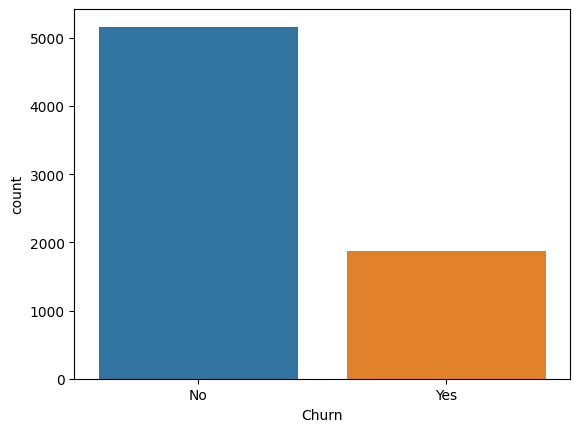

In [ ]:
sns.countplot(x = data["Churn"])

It's clear that there exists class imbalance in our dataset because 26.5% of customers churned while 73.5% of customers stayed.

Since decision-tree based models--such as **XGBoost**--are susceptible to frequency bias, we must address the class imbalance in one of two ways in order to make the distribution more equal:
1. Undersample the majority class (customer stayed)
2. Oversample the minority class (customer churned)

Since our dataset is relatively small at 7,043 rows, the better choice would be to pick option #2 and oversample the minority class.
This can be accomplished by the famous and very effective <u>S</u>ynthetic <u>M</u>inority-<u>O</u>versampling <u>T</u>echnique (**SMOTE** ).

Let's continue our exploration, this time focusing in on our numerical data.

<ipython-input-18-223df68f5e73>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["tenure"], shade = True)


<Axes: xlabel='tenure', ylabel='Density'>

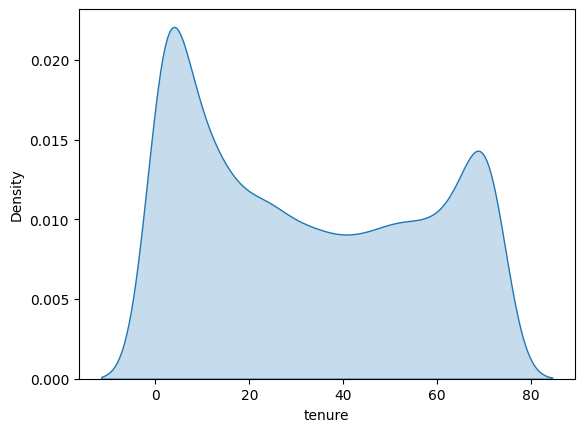

In [ ]:
# Checking distributions

# KDE - kernel density estimation

sns.kdeplot(data["tenure"], shade = True)

<ipython-input-19-61603b6020d0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["tenure"])


<Axes: xlabel='tenure', ylabel='Density'>

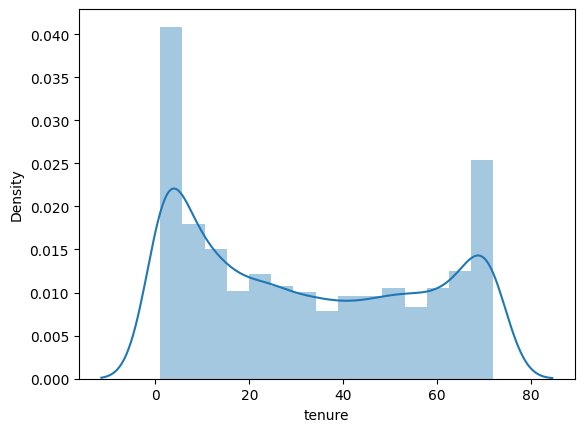

In [ ]:
sns.distplot(data["tenure"])

### <h3><center> Interesting Observations: </center></h3>
1. The distribution for `tenure` seems to be bimodal, that is, customers either tend to be relatively new (0-9 months) or tend to have been with the company for an extended period time (5+ years)
    - The fact that customers are heavily weighted towards being relatively new indicates that there is a legitimate need to improve customer retention rates.  But that's why we're here!
    - If we can successfully predict which customers are in danger of churning and provide them incentives to stay, these "flight-risk" customers could actually end up staying with us for many years to come!


<ipython-input-20-a3fd2a2ed83f>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["MonthlyCharges"], shade = True)


<Axes: xlabel='MonthlyCharges', ylabel='Density'>

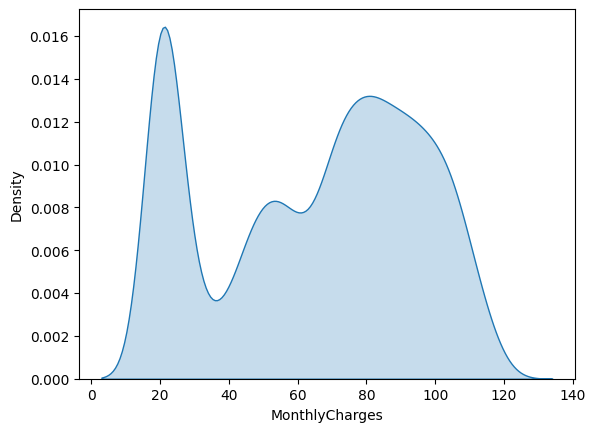

In [ ]:
sns.kdeplot(data["MonthlyCharges"], shade = True)

2. `MonthlyCharges` also seems to be bimodal, so customers either spend on the lower end of the spectrum (18-35 dollars) or--even more likely--on the higher end of the spectrum (70+ dollars).

<ipython-input-21-08067e37eb99>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["TotalCharges"], shade = True)


<Axes: xlabel='TotalCharges', ylabel='Density'>

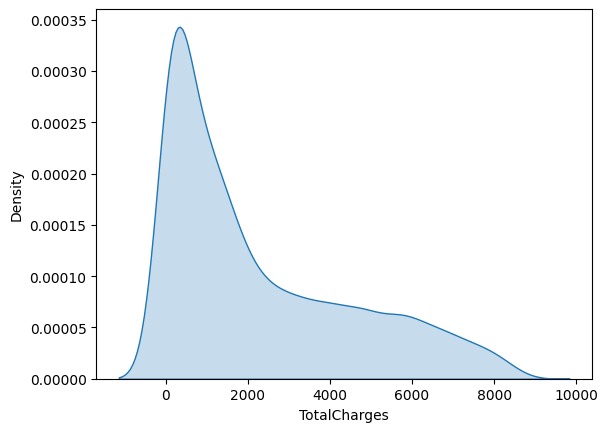

In [ ]:
sns.kdeplot(data["TotalCharges"], shade = True)

3. Looking at`TotalCharges`, we can see that it is more likely for a customer to have spent a relatively small total amount (0-1,000 dollars) than it is to have spent a relatively high amount (4,000-5,000 dollars, for instance)

<Axes: >

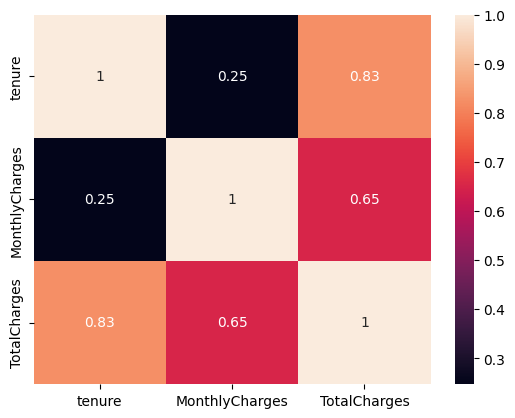

In [ ]:
# Correlation between Monthly Charges , Total charges and Tenure

cor_mat= data[['tenure','MonthlyCharges','TotalCharges']].corr()
cor_mat

sns.heatmap(cor_mat,annot=True)

In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
gender_dist=data['gender'].value_counts()
gender_churned_dist=data[data.Churn=='Yes']['gender'].value_counts()
gender_churned_dist

Female    939
Male      930
Name: gender, dtype: int64

<Axes: >

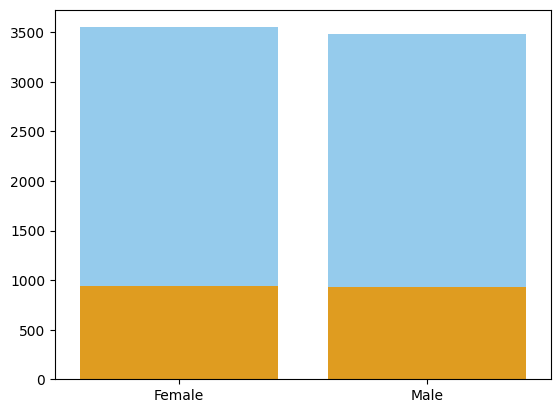

In [ ]:
sns.barplot(x=gender_dist.index,y=gender_dist.values,color='lightskyblue')
sns.barplot(x=gender_churned_dist.index,y=gender_churned_dist.values,color='orange')

In [ ]:
# Analysis: Data is imbalanced. Gender column is not affecting in churning

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [ ]:
# Working with help of extra example

X=np.random.rand(100,10)
Y=np.random.choice([0,1],size=100, p = [0.9, 0.1])

In [ ]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
smote=SMOTE(random_state=42)
X_sampled,y_sampled=smote.fit_resample(X,Y)

In [ ]:
np.bincount(Y)

array([90, 10])

In [ ]:
np.bincount(y_sampled)

array([90, 90])

In [ ]:
# undersampling
from imblearn.under_sampling import NearMiss
undersampler = NearMiss()
X_resampled, y_resampled = undersampler.fit_resample(X, Y)

In [ ]:
np.bincount(y_resampled)

array([10, 10])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
colnames=data.columns

In [ ]:
for x in colnames:
  if(data[x].dtype=='O' or data[x].dtype=='object'):
    data[x]=le.fit_transform(data[x])

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
X=data.drop(columns=["customerID","Churn", 'gender'])

In [ ]:
y = data["Churn"]

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,data['Churn'],test_size=0.3)

In [ ]:

y_train.value_counts()


0    3628
1    1294
Name: Churn, dtype: int64

In [ ]:
x_train,y_train=smote.fit_resample(x_train,y_train)

In [ ]:
y_train.value_counts()

1    3628
0    3628
Name: Churn, dtype: int64

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
Adaclass=AdaBoostClassifier()

In [ ]:
Adaclass.fit(x_train,y_train)

AdaBoostClassifier()

In [ ]:
y_pred=Adaclass.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_pred,y_test)

0.7587677725118483

In [ ]:
y_pred_train=Adaclass.predict(x_train)

In [ ]:
accuracy_score(y_pred_train,y_train)

0.8335170893054025

In [ ]:
# Overfitting - good acuuracy for training and bad for test
# Underfitting - no good accuracy in train or test

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GB=GradientBoostingClassifier()

In [ ]:
GB.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred=GB.predict(x_test)

In [ ]:
y_pred_train=GB.predict(x_train)

In [ ]:
accuracy_score(y_pred,y_test)

0.771090047393365

In [ ]:
accuracy_score(y_pred_train,y_train)

0.8500551267916208

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

xgModel=XGBClassifier()

xgModel.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred=xgModel.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.7687203791469195

In [ ]:
y_pred_train=xgModel.predict(x_train)

In [ ]:
accuracy_score(y_train,y_pred_train)

0.9583792723263506

In [ ]:
x_train.shape

(7256, 18)

# KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#k value

k=10   # you can take 85 as well Sqrt(7256)

knn_classifier= KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=10)

In [ ]:
# Accuracy on Train data
y_pred_train=knn_classifier.predict(x_train)
accuracy_score(y_pred_train,y_train)

0.8096747519294377

In [ ]:
# Accuracy on Train data
y_pred=knn_classifier.predict(x_test)
accuracy_score(y_pred,y_test)

0.7146919431279621

# KNN regressor

In [ ]:
# Regression Problem
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error


diabetes=load_diabetes()

In [ ]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
Y=diabetes['target']

In [ ]:
X=diabetes.data

In [ ]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn_regressor= KNeighborsRegressor(n_neighbors=12)

In [ ]:
knn_regressor.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=12)

In [ ]:
Y_pred=knn_regressor.predict(X_test)
Y_pred_train=knn_regressor.predict(X_train)

In [ ]:
mean_squared_error(Y_test,Y_pred)

3369.2873751560546

In [ ]:
mean_squared_error(Y_train,Y_pred_train)

2891.2106743783443

In [ ]:
k_val=np.arange(1,25)

from sklearn.metrics import r2_score

Text(0, 0.5, 'R2 Score')

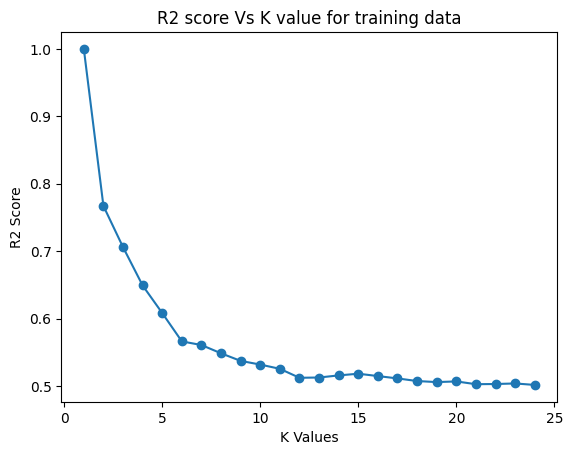

In [ ]:
r2=[]
for k in k_val:
  knn_regressor=KNeighborsRegressor(n_neighbors=k)
  knn_regressor.fit(X_train,Y_train)
  Y_pred=knn_regressor.predict(X_train)

  r2s=r2_score(Y_train,Y_pred)
  r2.append(r2s)

plt.plot(k_val,r2,marker='o',linestyle='-')
plt.title("R2 score Vs K value for training data")
plt.xlabel('K Values')
plt.ylabel('R2 Score')

Text(0, 0.5, 'R2 Score')

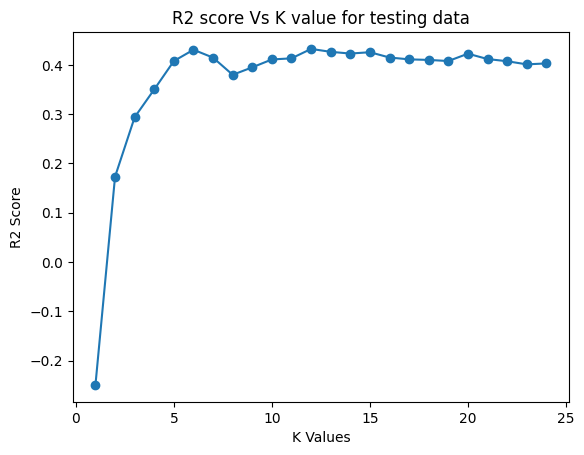

In [ ]:
r2=[]
for k in k_val:
  knn_regressor=KNeighborsRegressor(n_neighbors=k)
  knn_regressor.fit(X_train,Y_train)
  Y_pred=knn_regressor.predict(X_test)

  ms=r2_score(Y_test,Y_pred)
  r2.append(ms)

plt.plot(k_val,r2,marker='o',linestyle='-')
plt.title("R2 score Vs K value for testing data")
plt.xlabel('K Values')
plt.ylabel('R2 Score')

In [1]:
# prompt:

# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# load the dataset
data = pd.read_csv("customer_churn.csv")

# separate features and target
X = data.drop("Churn", axis=1)
y = data["Churn"]

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train a random forest classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

# make predictions on the test set
y_pred = rfc.predict(X_test)

# evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


FileNotFoundError: [Errno 2] No such file or directory: 'customer_churn.csv'